***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Análisis de Matriz de frecuencias tipo de eventos ejecutados por un usuario en GIANT </h5>
  <h3> RT - 009 - 1 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<p style='text-align: justify;'> 

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

</p>

In [1]:
import Pkg; 
Pkg.add("Pkg")
using Pkg;

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [14]:
# Cargando los paquetes instalados
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using StatsBase
using Lathe
using Clustering #Métodos para la agrupación de datos y evaluación de la calidad de la agrupación.
using Distances
gr()

Plots.GRBackend()

<div align="center">
  <h2> 2. CARGANDO LOS DATOS  </h2>
</div>

In [3]:
# Se van a leer los datos usando un Archivo tipo CSV y lo vamos a convertir en un DataFrame 
eventsDataFrame = DataFrame(CSV.File("../data/events_30_10_2020.csv"))
first(eventsDataFrame,5)

5×14 DataFrame. Omitted printing of 12 columns
│ Row │ _id                      │ id    │
│     │ String                   │ Int64 │
├─────┼──────────────────────────┼───────┤
│ 1   │ 5fa09d8267fbc452c4f02343 │ 1     │
│ 2   │ 5fa09d8267fbc452c4f02344 │ 2     │
│ 3   │ 5fa09d8267fbc452c4f02345 │ 3     │
│ 4   │ 5fa09d8267fbc452c4f02346 │ 4     │
│ 5   │ 5fa09d8267fbc452c4f02347 │ 5     │

In [4]:
#Resumen del marco de los datos
println(size(eventsDataFrame))

(40674, 14)


In [5]:
#Convirtiendo variables en tipo String
eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]]=convert(Array{String}, eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]])

40674×5 Array{String,2}:
 "\\giant\\event\\extended_challenge_team_viewed"  …  "extended_challenge_team"  "r"
 "\\core\\event\\user_login_failed"                   "user_login"               "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\course_viewed"                       "course"                   "r"
 "\\core\\event\\course_viewed"                    …  "course"                   "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                    …  "user"                     "r"
 "\\core\\event\\dashboard_viewed"      

In [6]:
#IDENTIFICANDO CATEGORIAS de la variable eventname
l = unique(eventsDataFrame[!,:eventname])

109-element Array{String,1}:
 "\\giant\\event\\extended_challenge_team_viewed"
 "\\core\\event\\user_login_failed"
 "\\core\\event\\user_loggedin"
 "\\core\\event\\dashboard_viewed"
 "\\core\\event\\course_viewed"
 "\\core\\event\\user_profile_viewed"
 "\\mod_scorm\\event\\course_module_viewed"
 "\\mod_scorm\\event\\sco_launched"
 "\\giant\\event\\collaborative_wall_viewed"
 "\\mod_lesson\\event\\lesson_started"
 "\\mod_lesson\\event\\course_module_viewed"
 "\\mod_lesson\\event\\content_page_viewed"
 "\\core_h5p\\event\\h5p_viewed"
 ⋮
 "\\core\\event\\enrol_instance_created"
 "\\tool_recyclebin\\event\\course_bin_item_created"
 "\\core\\event\\course_module_deleted"
 "\\core\\event\\course_section_updated"
 "\\core\\event\\course_section_deleted"
 "\\giant\\event\\challenge_viewed"
 "\\giant\\event\\extended_challenge_created"
 "\\giant\\event\\extended_challenge_deleted"
 "\\giant\\event\\noteboard_viewed"
 "\\mod_forum\\event\\course_searched"
 "\\core\\event\\user_loggedinas"
 "\\mo

In [7]:
dfEventsGiant = DataFrame(EVENT_TYPE = l )

109×1 DataFrame
│ Row │ EVENT_TYPE                                             │
│     │ String                                                 │
├─────┼────────────────────────────────────────────────────────┤
│ 1   │ \\giant\\event\\extended_challenge_team_viewed         │
│ 2   │ \\core\\event\\user_login_failed                       │
│ 3   │ \\core\\event\\user_loggedin                           │
│ 4   │ \\core\\event\\dashboard_viewed                        │
│ 5   │ \\core\\event\\course_viewed                           │
│ 6   │ \\core\\event\\user_profile_viewed                     │
│ 7   │ \\mod_scorm\\event\\course_module_viewed               │
│ 8   │ \\mod_scorm\\event\\sco_launched                       │
│ 9   │ \\giant\\event\\collaborative_wall_viewed              │
│ 10  │ \\mod_lesson\\event\\lesson_started                    │
⋮
│ 99  │ \\tool_recyclebin\\event\\course_bin_item_created      │
│ 100 │ \\core\\event\\course_module_deleted                   │
│ 101 │ \\core\\event\\course_section_updated                  │
│ 102 │ \\core\\event\\course_section_deleted                  │
│ 103 │ \\giant\\event\\challenge_viewed                       │
│ 104 │ \\giant\\event\\extended_challenge_created             │
│ 105 │ \\giant\\event\\extended_challenge_deleted             │
│ 106 │ \\giant\\event\\noteboard_viewed                       │
│ 107 │ \\mod_forum\\event\\course_searched                    │
│ 108 │ \\core\\event\\user_loggedinas                         │
│ 109 │ \\mod_forum\\event\\course_module_instance_list_viewed │

In [8]:
CSV.write("events_giant.csv", dfEventsGiant)

"events_giant.csv"

In [9]:
#Cambiando valores categóricos por numéricos en la columna EventName
eventsDataFrame[!,:eventname]=replace(eventsDataFrame[!,:eventname], Pair.(l, axes(l, 1))...)

40674-element Array{Any,1}:
 1
 2
 3
 4
 5
 5
 4
 4
 3
 4
 3
 4
 6
 ⋮
 5
 5
 4
 5
 3
 4
 5
 5
 5
 7
 7
 8

In [10]:
maximum(eventsDataFrame[!,:eventname])

109

In [11]:
dfUserEvents = DataFrame(USER_ID = eventsDataFrame[!,:userid], EVENT_TYPE = convert(Array{Int64}, eventsDataFrame[!,:eventname]) )

40674×2 DataFrame
│ Row   │ USER_ID │ EVENT_TYPE │
│       │ Int64   │ Int64      │
├───────┼─────────┼────────────┤
│ 1     │ 78      │ 1          │
│ 2     │ 141     │ 2          │
│ 3     │ 141     │ 3          │
│ 4     │ 141     │ 4          │
│ 5     │ 141     │ 5          │
│ 6     │ 141     │ 5          │
│ 7     │ 141     │ 4          │
│ 8     │ 141     │ 4          │
│ 9     │ 48      │ 3          │
│ 10    │ 48      │ 4          │
⋮
│ 40664 │ 84      │ 5          │
│ 40665 │ 84      │ 4          │
│ 40666 │ 84      │ 5          │
│ 40667 │ 112     │ 3          │
│ 40668 │ 112     │ 4          │
│ 40669 │ 112     │ 5          │
│ 40670 │ 112     │ 5          │
│ 40671 │ 112     │ 5          │
│ 40672 │ 112     │ 7          │
│ 40673 │ 112     │ 7          │
│ 40674 │ 112     │ 8          │

In [12]:
maximum(dfUserEvents[!,:EVENT_TYPE])

109

In [13]:
scatter(dfUserEvents.USER_ID, dfUserEvents.EVENT_TYPE, marker_z=dfUserEvents.EVENT_TYPE,
        color=:lightrainbow,title="Events executed by user",ylabel ="Event executed",xlabel="User ID",legend=false,size=(700,300))

<div align="center">
  <h2> 3. PREPROCESAMIENTO DE LOS DATOS </h2>
</div>
<h3> 3.1 One Hot Encoding </h3>
<p style='text-align: justify;'> 
    Vamos a convertir el tipo de evento para lograr formar múltiples columnas numéricas - (normalización de los datos) ya que tenemos estás categorías. Esto nos va a ayudar para que las variables puedan introducirse en los algoritmos de aprendizaje automático para hacer un mejor trabajo en la predicción.
</p>

In [15]:
scaled_feature = Lathe.preprocess.OneHotEncode(dfUserEvents,:EVENT_TYPE)

(::Lathe.preprocess.var"#predict#23") (generic function with 1 method)

In [16]:
EventsMatrix=select!(dfUserEvents, Not(:EVENT_TYPE))

40674×110 DataFrame. Omitted printing of 101 columns
│ Row   │ USER_ID │ 1    │ 2    │ 3    │ 4    │ 5    │ 6    │ 7    │ 8    │
│       │ Int64   │ Bool │ Bool │ Bool │ Bool │ Bool │ Bool │ Bool │ Bool │
├───────┼─────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ 1     │ 78      │ 1    │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │
│ 2     │ 141     │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │
│ 3     │ 141     │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │ 0    │
│ 4     │ 141     │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
│ 5     │ 141     │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 6     │ 141     │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 7     │ 141     │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
│ 8     │ 141     │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
│ 9     │ 48      │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │ 0    │
│ 10    │ 48      │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
⋮
│ 40664 │ 84      │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 40665 │ 84      │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
│ 40666 │ 84      │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 40667 │ 112     │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │ 0    │
│ 40668 │ 112     │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │ 0    │
│ 40669 │ 112     │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 40670 │ 112     │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 40671 │ 112     │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │ 0    │ 0    │
│ 40672 │ 112     │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │
│ 40673 │ 112     │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │ 1    │ 0    │
│ 40674 │ 112     │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │ 0    │ 1    │

In [17]:
#Obteniendo un arreglo de los eventos realizados por un usuario
to_group_events = names(EventsMatrix[!, Not(:USER_ID)])

109-element Array{String,1}:
 "1"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"
 "10"
 "11"
 "12"
 "13"
 ⋮
 "98"
 "99"
 "100"
 "101"
 "102"
 "103"
 "104"
 "105"
 "106"
 "107"
 "108"
 "109"

In [18]:
#Agrupando un único usuario con la suma de los eventos realizados
frequencyEventsMatrix=combine(groupby(EventsMatrix, :USER_ID), to_group_events .=> sum .=> to_group_events)

109×110 DataFrame. Omitted printing of 102 columns
│ Row │ USER_ID │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │ 7     │
│     │ Int64   │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ 78      │ 6     │ 0     │ 4     │ 4     │ 14    │ 0     │ 9     │
│ 2   │ 141     │ 0     │ 3     │ 16    │ 23    │ 131   │ 0     │ 33    │
│ 3   │ 48      │ 0     │ 2     │ 25    │ 34    │ 147   │ 1     │ 41    │
│ 4   │ 139     │ 0     │ 1     │ 6     │ 6     │ 19    │ 0     │ 4     │
│ 5   │ 63      │ 0     │ 0     │ 5     │ 6     │ 26    │ 0     │ 19    │
│ 6   │ 57      │ 0     │ 0     │ 3     │ 3     │ 18    │ 0     │ 12    │
│ 7   │ 99      │ 0     │ 0     │ 5     │ 5     │ 37    │ 0     │ 12    │
│ 8   │ 0       │ 0     │ 103   │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 9   │ 142     │ 2     │ 0     │ 4     │ 9     │ 98    │ 1     │ 82    │
│ 10  │ -1      │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
⋮
│ 99  │ 138     │ 0     │ 2     │ 2     │ 4     │ 8     │ 0     │ 2     │
│ 100 │ 5       │ 0     │ 1     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 101 │ 157     │ 0     │ 7     │ 6     │ 7     │ 82    │ 0     │ 29    │
│ 102 │ 7       │ 0     │ 3     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 103 │ 143     │ 1     │ 2     │ 1     │ 3     │ 42    │ 0     │ 19    │
│ 104 │ 160     │ 2     │ 0     │ 1     │ 1     │ 36    │ 0     │ 16    │
│ 105 │ 169     │ 0     │ 2     │ 1     │ 1     │ 16    │ 0     │ 5     │
│ 106 │ 146     │ 0     │ 2     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 107 │ 168     │ 1     │ 1     │ 2     │ 1     │ 28    │ 0     │ 18    │
│ 108 │ 165     │ 0     │ 1     │ 1     │ 3     │ 28    │ 0     │ 5     │
│ 109 │ 158     │ 1     │ 0     │ 1     │ 1     │ 36    │ 0     │ 10    │

In [19]:
#Organizando la matriz de frecuencia de los eventos por identificador de usuario
frequencyEventsMatrix=sort!(frequencyEventsMatrix, [:USER_ID])

109×110 DataFrame. Omitted printing of 102 columns
│ Row │ USER_ID │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │ 7     │
│     │ Int64   │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ -10     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ -1      │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 3   │ 0       │ 0     │ 103   │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 4   │ 2       │ 0     │ 3     │ 65    │ 114   │ 290   │ 13    │ 16    │
│ 5   │ 3       │ 0     │ 2     │ 33    │ 42    │ 162   │ 6     │ 45    │
│ 6   │ 4       │ 3     │ 9     │ 95    │ 111   │ 577   │ 11    │ 286   │
│ 7   │ 5       │ 0     │ 1     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 8   │ 6       │ 0     │ 0     │ 8     │ 8     │ 97    │ 0     │ 14    │
│ 9   │ 7       │ 0     │ 3     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 10  │ 8       │ 2     │ 0     │ 1     │ 1     │ 2     │ 0     │ 1     │
⋮
│ 99  │ 154     │ 0     │ 4     │ 1     │ 2     │ 1     │ 0     │ 0     │
│ 100 │ 156     │ 1     │ 2     │ 5     │ 7     │ 120   │ 3     │ 61    │
│ 101 │ 157     │ 0     │ 7     │ 6     │ 7     │ 82    │ 0     │ 29    │
│ 102 │ 158     │ 1     │ 0     │ 1     │ 1     │ 36    │ 0     │ 10    │
│ 103 │ 160     │ 2     │ 0     │ 1     │ 1     │ 36    │ 0     │ 16    │
│ 104 │ 161     │ 2     │ 7     │ 7     │ 11    │ 130   │ 1     │ 33    │
│ 105 │ 164     │ 0     │ 3     │ 2     │ 3     │ 31    │ 1     │ 8     │
│ 106 │ 165     │ 0     │ 1     │ 1     │ 3     │ 28    │ 0     │ 5     │
│ 107 │ 166     │ 0     │ 0     │ 1     │ 1     │ 12    │ 0     │ 6     │
│ 108 │ 168     │ 1     │ 1     │ 2     │ 1     │ 28    │ 0     │ 18    │
│ 109 │ 169     │ 0     │ 2     │ 1     │ 1     │ 16    │ 0     │ 5     │

In [20]:
to_group_users = frequencyEventsMatrix[!,:USER_ID]

109-element Array{Int64,1}:
 -10
  -1
   0
   2
   3
   4
   5
   6
   7
   8
   9
  10
  18
   ⋮
 153
 154
 156
 157
 158
 160
 161
 164
 165
 166
 168
 169

In [32]:
describe(frequencyEventsMatrix)

101×8 DataFrame. Omitted printing of 1 columns
│ Row │ variable │ mean      │ min   │ median  │ max   │ nunique │ nmissing │
│     │ Symbol   │ Float64   │ Int64 │ Float64 │ Int64 │ Nothing │ Nothing  │
├─────┼──────────┼───────────┼───────┼─────────┼───────┼─────────┼──────────┤
│ 1   │ USER_ID  │ 72.4318   │ -10   │ 73.5    │ 145   │         │          │
│ 2   │ 1        │ 3.04545   │ 0     │ 0.0     │ 134   │         │          │
│ 3   │ 2        │ 2.35227   │ 0     │ 1.0     │ 45    │         │          │
│ 4   │ 3        │ 8.71591   │ 0     │ 5.0     │ 48    │         │          │
│ 5   │ 4        │ 11.1705   │ 0     │ 7.0     │ 80    │         │          │
│ 6   │ 5        │ 52.3977   │ 0     │ 27.0    │ 310   │         │          │
│ 7   │ 6        │ 1.82955   │ 0     │ 0.0     │ 45    │         │          │
│ 8   │ 7        │ 18.5341   │ 0     │ 11.5    │ 144   │         │          │
│ 9   │ 8        │ 11.6591   │ 0     │ 9.0     │ 71    │         │          │
│ 10  │ 9        │ 6.43182   │ 0     │ 4.0     │ 53    │         │          │
⋮
│ 91  │ 90       │ 0.0227273 │ 0     │ 0.0     │ 2     │         │          │
│ 92  │ 91       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 93  │ 92       │ 0.0227273 │ 0     │ 0.0     │ 2     │         │          │
│ 94  │ 93       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 95  │ 94       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 96  │ 95       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 97  │ 96       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 98  │ 97       │ 0.113636  │ 0     │ 0.0     │ 10    │         │          │
│ 99  │ 98       │ 0.0340909 │ 0     │ 0.0     │ 3     │         │          │
│ 100 │ 99       │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │
│ 101 │ 100      │ 0.0113636 │ 0     │ 0.0     │ 1     │         │          │

In [26]:
frequencyEventsDataFrameWithoutUsers=frequencyEventsMatrix[!, Not(:USER_ID)]

109×109 DataFrame. Omitted printing of 100 columns
│ Row │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │ 7     │ 8     │ 9     │
│     │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 3   │ 0     │ 103   │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 4   │ 0     │ 3     │ 65    │ 114   │ 290   │ 13    │ 16    │ 7     │ 0     │
│ 5   │ 0     │ 2     │ 33    │ 42    │ 162   │ 6     │ 45    │ 20    │ 0     │
│ 6   │ 3     │ 9     │ 95    │ 111   │ 577   │ 11    │ 286   │ 201   │ 41    │
│ 7   │ 0     │ 1     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 8   │ 0     │ 0     │ 8     │ 8     │ 97    │ 0     │ 14    │ 11    │ 0     │
│ 9   │ 0     │ 3     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 10  │ 2     │ 0     │ 1     │ 1     │ 2     │ 0     │ 1     │ 1     │ 0     │
⋮
│ 99  │ 0     │ 4     │ 1     │ 2     │ 1     │ 0     │ 0     │ 0     │ 0     │
│ 100 │ 1     │ 2     │ 5     │ 7     │ 120   │ 3     │ 61    │ 52    │ 28    │
│ 101 │ 0     │ 7     │ 6     │ 7     │ 82    │ 0     │ 29    │ 23    │ 18    │
│ 102 │ 1     │ 0     │ 1     │ 1     │ 36    │ 0     │ 10    │ 9     │ 6     │
│ 103 │ 2     │ 0     │ 1     │ 1     │ 36    │ 0     │ 16    │ 12    │ 5     │
│ 104 │ 2     │ 7     │ 7     │ 11    │ 130   │ 1     │ 33    │ 31    │ 13    │
│ 105 │ 0     │ 3     │ 2     │ 3     │ 31    │ 1     │ 8     │ 7     │ 6     │
│ 106 │ 0     │ 1     │ 1     │ 3     │ 28    │ 0     │ 5     │ 5     │ 0     │
│ 107 │ 0     │ 0     │ 1     │ 1     │ 12    │ 0     │ 6     │ 4     │ 1     │
│ 108 │ 1     │ 1     │ 2     │ 1     │ 28    │ 0     │ 18    │ 6     │ 5     │
│ 109 │ 0     │ 2     │ 1     │ 1     │ 16    │ 0     │ 5     │ 6     │ 5     │

<div align="center">
  <h2> 4. NORMALIZACIÓN DE LOS DATOS </h2>
</div>

In [25]:
frequencyMatrixEvents=Matrix(convert(Array{Float64}, frequencyEventsDataFrameWithoutUsers))

UndefVarError: UndefVarError: frequencyEventsDataFrameWithoutUsers not defined

In [24]:
dt = fit(ZScoreTransform, Matrix(frequencyMatrixEvents), dims=2)

UndefVarError: UndefVarError: frequencyMatrixEvents not defined

In [23]:
normalizeFrequencyMatrixEvents=StatsBase.transform(dt, Matrix(frequencyMatrixEvents))

UndefVarError: UndefVarError: frequencyMatrixEvents not defined

In [42]:
Pkg.add("ParallelKMeans")
using ParallelKMeans

  Resolving package versions...
  Installed UnsafeArrays ────── v1.0.1
  Installed ScientificTypes ─── v1.1.0
  Installed MLJModelInterface ─ v0.3.5
  Installed ParallelKMeans ──── v0.1.8
   Updating `~/.julia/environments/v1.4/Project.toml`
  [42b8e9d4] + ParallelKMeans v0.1.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [e80e1ace] + MLJModelInterface v0.3.5
  [42b8e9d4] + ParallelKMeans v0.1.8
  [321657f4] + ScientificTypes v1.1.0
  [c4a57d5a] + UnsafeArrays v1.0.1
┌ Info: Precompiling ParallelKMeans [42b8e9d4-006b-409a-8472-7f34b3fb58af]
└ @ Base loading.jl:1260


In [121]:
# Single Thread Implementation of Lloyd's Algorithm
y = [ParallelKMeans.kmeans(Matrix(normalizeFrequencyMatrixEvents)', i, n_threads=1; tol=1e-6, max_iters=300, verbose=false).totalcost for i = 2:25]

24-element Array{Float64,1}:
 2669.1816171053338
 1969.5144463861152
 1835.246405515261
 1650.9906485696692
 1540.6185534678839
 1337.0028474319383
 1218.9257920401135
 1171.4223288469848
 1045.6845862872592
  909.225353106017
  945.7632203784817
  847.3717218356128
  736.2036181960375
  809.3503746395083
  711.2266509262674
  729.9155967389719
  581.4866789184499
  664.9398796240008
  499.6952414284213
  493.0684373282071
  480.59763505128365
  515.1258281939732
  414.3029426933796
  379.88685098326704

In [123]:
typeof(y)

Array{Float64,1}

In [124]:
x=2:25
typeof(x)

UnitRange{Int64}

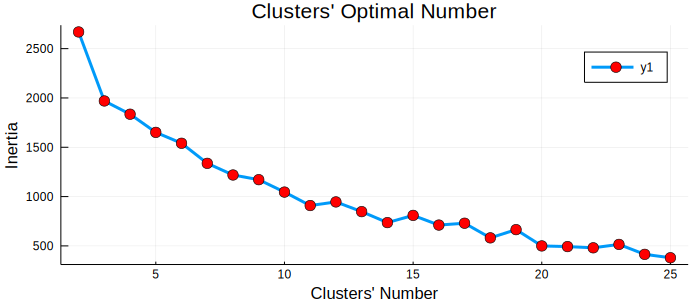

In [122]:

plot(x, y, title = "Clusters' Optimal  Number", xlabel = "Clusters' Number", ylabel = "Inertia", lw = 3, marker=:circle, ms=6, mc=:red, size=(700,300))

<div align="center">
  <h2> 5. OBSERVACIÓN DE RESULTADOS APLICANDO APRENDIZAJE AUTOMÁTICO NO SUPERVISADO </h2>
</div>

<div align="center">
  <h2> 5.1 K-MEANS </h2>
</div>

In [37]:
#K-MEANS
C = kmeans(Matrix(normalizeFrequencyMatrixEvents)', 4)

KmeansResult{Array{Float64,2},Float64,Int64}([-0.21995714216143697 0.6290539139554164 -0.10000000000000006 -0.17021491872432812; -0.11760726992412972 0.12429750429579679 -0.10000000000000006 4.063634416462704; … ; -0.3145437742422934 -0.25703586768262454 -0.10000000000000006 -0.17021491872432812; -0.3145437742422934 -0.25703586768262454 -0.10000000000000006 -0.17021491872432812], [3, 3, 4, 1, 2, 2, 2, 2, 1, 2  …  1, 1, 4, 1, 1, 2, 1, 2, 4, 4], [50.00000000000061, 50.00000000000077, 64.27192487298697, 51.73949366469316, 25.85825270138318, 5.793785435897178, 11.850309324832608, 35.38643367799364, 30.904824870832158, 11.57268016300182  …  7.200242684727272, 7.939418338708464, 72.84590468585851, 9.253240763663001, 16.269415102430486, 17.25842825725988, 5.503190575190217, 14.637451378901886, 35.90089121056131, 32.41194010547542], [29, 49, 2, 8], [29, 49, 2, 8], 1827.6958606959527, 4, true)

In [38]:
frequencyEventsKmeans=frequencyEventsMatrix

88×101 DataFrame. Omitted printing of 93 columns
│ Row │ USER_ID │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │ 7     │
│     │ Int64   │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ -10     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ -1      │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 3   │ 0       │ 0     │ 45    │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 4   │ 2       │ 0     │ 3     │ 39    │ 80    │ 126   │ 10    │ 4     │
│ 5   │ 3       │ 0     │ 1     │ 6     │ 7     │ 26    │ 1     │ 5     │
│ 6   │ 4       │ 3     │ 2     │ 34    │ 52    │ 205   │ 10    │ 100   │
│ 7   │ 6       │ 0     │ 0     │ 3     │ 3     │ 39    │ 0     │ 11    │
│ 8   │ 8       │ 2     │ 0     │ 1     │ 1     │ 2     │ 0     │ 1     │
│ 9   │ 9       │ 11    │ 0     │ 8     │ 15    │ 36    │ 30    │ 3     │
│ 10  │ 10      │ 134   │ 6     │ 48    │ 70    │ 310   │ 45    │ 144   │
⋮
│ 78  │ 128     │ 0     │ 3     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 79  │ 132     │ 1     │ 17    │ 9     │ 19    │ 79    │ 8     │ 7     │
│ 80  │ 133     │ 28    │ 24    │ 21    │ 18    │ 140   │ 1     │ 29    │
│ 81  │ 134     │ 0     │ 0     │ 2     │ 4     │ 2     │ 7     │ 1     │
│ 82  │ 137     │ 1     │ 11    │ 19    │ 23    │ 146   │ 0     │ 27    │
│ 83  │ 139     │ 0     │ 1     │ 6     │ 6     │ 19    │ 0     │ 4     │
│ 84  │ 140     │ 1     │ 4     │ 11    │ 12    │ 42    │ 3     │ 19    │
│ 85  │ 141     │ 0     │ 3     │ 16    │ 23    │ 131   │ 0     │ 33    │
│ 86  │ 142     │ 2     │ 0     │ 3     │ 8     │ 94    │ 1     │ 78    │
│ 87  │ 144     │ 0     │ 2     │ 2     │ 7     │ 0     │ 0     │ 0     │
│ 88  │ 145     │ 0     │ 1     │ 2     │ 4     │ 0     │ 0     │ 0     │

In [39]:
insertcols!(frequencyEventsKmeans,2,:kmeans_4=>C.assignments, makeunique=true)

88×102 DataFrame. Omitted printing of 94 columns
│ Row │ USER_ID │ kmeans_4 │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │
│     │ Int64   │ Int64    │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ -10     │ 3        │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ -1      │ 3        │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 3   │ 0       │ 4        │ 0     │ 45    │ 0     │ 0     │ 0     │ 0     │
│ 4   │ 2       │ 1        │ 0     │ 3     │ 39    │ 80    │ 126   │ 10    │
│ 5   │ 3       │ 2        │ 0     │ 1     │ 6     │ 7     │ 26    │ 1     │
│ 6   │ 4       │ 2        │ 3     │ 2     │ 34    │ 52    │ 205   │ 10    │
│ 7   │ 6       │ 2        │ 0     │ 0     │ 3     │ 3     │ 39    │ 0     │
│ 8   │ 8       │ 2        │ 2     │ 0     │ 1     │ 1     │ 2     │ 0     │
│ 9   │ 9       │ 1        │ 11    │ 0     │ 8     │ 15    │ 36    │ 30    │
│ 10  │ 10      │ 2        │ 134   │ 6     │ 48    │ 70    │ 310   │ 45    │
⋮
│ 78  │ 128     │ 4        │ 0     │ 3     │ 0     │ 0     │ 0     │ 0     │
│ 79  │ 132     │ 1        │ 1     │ 17    │ 9     │ 19    │ 79    │ 8     │
│ 80  │ 133     │ 1        │ 28    │ 24    │ 21    │ 18    │ 140   │ 1     │
│ 81  │ 134     │ 4        │ 0     │ 0     │ 2     │ 4     │ 2     │ 7     │
│ 82  │ 137     │ 1        │ 1     │ 11    │ 19    │ 23    │ 146   │ 0     │
│ 83  │ 139     │ 1        │ 0     │ 1     │ 6     │ 6     │ 19    │ 0     │
│ 84  │ 140     │ 2        │ 1     │ 4     │ 11    │ 12    │ 42    │ 3     │
│ 85  │ 141     │ 1        │ 0     │ 3     │ 16    │ 23    │ 131   │ 0     │
│ 86  │ 142     │ 2        │ 2     │ 0     │ 3     │ 8     │ 94    │ 1     │
│ 87  │ 144     │ 4        │ 0     │ 2     │ 2     │ 7     │ 0     │ 0     │
│ 88  │ 145     │ 4        │ 0     │ 1     │ 2     │ 4     │ 0     │ 0     │

In [101]:
select!(frequencyEventsKmeans, Not(:kmeans_4))

88×103 DataFrame. Omitted printing of 96 columns
│ Row │ USER_ID │ kmeans_4_1 │ kmedoids4 │ 1     │ 2     │ 3     │ 4     │
│     │ Int64   │ Int64      │ Int64     │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼────────────┼───────────┼───────┼───────┼───────┼───────┤
│ 1   │ 3       │ 3          │ 1         │ 0     │ 1     │ 6     │ 7     │
│ 2   │ 6       │ 3          │ 1         │ 0     │ 0     │ 3     │ 3     │
│ 3   │ 8       │ 3          │ 1         │ 2     │ 0     │ 1     │ 1     │
│ 4   │ 23      │ 2          │ 1         │ 0     │ 6     │ 3     │ 4     │
│ 5   │ 28      │ 1          │ 1         │ 0     │ 1     │ 3     │ 3     │
│ 6   │ 29      │ 1          │ 1         │ 0     │ 0     │ 1     │ 2     │
│ 7   │ 36      │ 1          │ 1         │ 0     │ 0     │ 1     │ 2     │
│ 8   │ 42      │ 1          │ 1         │ 0     │ 3     │ 6     │ 8     │
│ 9   │ 60      │ 2          │ 1         │ 0     │ 0     │ 1     │ 1     │
│ 10  │ 70      │ 1          │ 1         │ 0     │ 0     │ 1     │ 1     │
⋮
│ 78  │ 92      │ 3          │ 4         │ 0     │ 0     │ 9     │ 12    │
│ 79  │ 140     │ 2          │ 4         │ 1     │ 4     │ 11    │ 12    │
│ 80  │ 68      │ 2          │ 4         │ 0     │ 1     │ 4     │ 5     │
│ 81  │ 75      │ 3          │ 4         │ 0     │ 1     │ 9     │ 8     │
│ 82  │ 125     │ 2          │ 4         │ 0     │ 0     │ 10    │ 8     │
│ 83  │ 26      │ 2          │ 4         │ 0     │ 0     │ 4     │ 6     │
│ 84  │ 27      │ 1          │ 4         │ 0     │ 0     │ 5     │ 8     │
│ 85  │ 32      │ 2          │ 4         │ 0     │ 0     │ 9     │ 13    │
│ 86  │ 58      │ 1          │ 4         │ 0     │ 4     │ 10    │ 10    │
│ 87  │ 71      │ 3          │ 4         │ 0     │ 2     │ 8     │ 12    │
│ 88  │ 142     │ 3          │ 4         │ 2     │ 0     │ 3     │ 8     │

In [40]:
gdKmeans=groupby(frequencyEventsKmeans, :kmeans_4)

GroupedDataFrame with 4 groups based on key: kmeans_4
First Group (2 rows): kmeans_4 = 3. Omitted printing of 94 columns
│ Row │ USER_ID │ kmeans_4 │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │
│     │ Int64   │ Int64    │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ -10     │ 3        │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ -1      │ 3        │ 0     │ 0     │ 0     │ 0     │ 0     │ 0     │
⋮
Last Group (49 rows): kmeans_4 = 2. Omitted printing of 94 columns
│ Row │ USER_ID │ kmeans_4 │ 1     │ 2     │ 3     │ 4     │ 5     │ 6     │
│     │ Int64   │ Int64    │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ 3       │ 2        │ 0     │ 1     │ 6     │ 7     │ 26    │ 1     │
│ 2   │ 4       │ 2        │ 3     │ 2     │ 34    │ 52    │ 205   │ 10    │
│ 3   │ 6       │ 2        │ 0     │ 0     │ 3     │ 3     │ 39    │ 0     │
│ 4   │ 8       │ 2        │ 2     │ 0     │ 1     │ 1     │ 2     │ 0     │
│ 5   │ 10      │ 2        │ 134   │ 6     │ 48    │ 70    │ 310   │ 45    │
│ 6   │ 18      │ 2        │ 0     │ 3     │ 5     │ 8     │ 95    │ 0     │
│ 7   │ 23      │ 2        │ 0     │ 6     │ 3     │ 4     │ 15    │ 0     │
│ 8   │ 26      │ 2        │ 0     │ 0     │ 4     │ 6     │ 52    │ 0     │
│ 9   │ 27      │ 2        │ 0     │ 0     │ 5     │ 8     │ 52    │ 0     │
│ 10  │ 28      │ 2        │ 0     │ 1     │ 3     │ 3     │ 35    │ 0     │
⋮
│ 39  │ 95      │ 2        │ 0     │ 0     │ 2     │ 2     │ 18    │ 0     │
│ 40  │ 99      │ 2        │ 0     │ 0     │ 4     │ 4     │ 18    │ 0     │
│ 41  │ 101     │ 2        │ 1     │ 0     │ 1     │ 1     │ 4     │ 0     │
│ 42  │ 102     │ 2        │ 0     │ 0     │ 3     │ 5     │ 21    │ 0     │
│ 43  │ 111     │ 2        │ 0     │ 0     │ 1     │ 4     │ 2     │ 1     │
│ 44  │ 115     │ 2        │ 0     │ 2     │ 11    │ 7     │ 26    │ 0     │
│ 45  │ 118     │ 2        │ 2     │ 1     │ 3     │ 3     │ 8     │ 0     │
│ 46  │ 119     │ 2        │ 0     │ 3     │ 1     │ 1     │ 4     │ 0     │
│ 47  │ 120     │ 2        │ 1     │ 3     │ 2     │ 11    │ 27    │ 2     │
│ 48  │ 140     │ 2        │ 1     │ 4     │ 11    │ 12    │ 42    │ 3     │
│ 49  │ 142     │ 2        │ 2     │ 0     │ 3     │ 8     │ 94    │ 1     │

In [85]:
CSV.write("groups_events_giant_2_4.csv", gdKmeans[4])

"groups_events_giant_2_4.csv"

<div align="center">
  <h2> 5.2 K-MEDOIDS </h2>
</div>

In [88]:
xmatrix = Matrix(normalizeFrequencyMatrixEvents)'
D = pairwise(Euclidean(), xmatrix, xmatrix, dims=2)
K = kmedoids(D, 4)

KmedoidsResult{Float64}([37, 69, 62, 6], [2, 1, 2, 3, 4, 4, 4, 4, 3, 4  …  3, 3, 4, 3, 3, 4, 3, 4, 2, 2], [14.166657660388402, 14.081077110803571, 6.370545758349936, 7.825065397747202, 4.530660921536821, 0.0, 2.4688776810442685, 6.925931517336633, 6.041361175304278, 3.7224859111915083  …  2.868572452974013, 2.9825746283536985, 10.969272259887985, 3.3064667945688777, 4.536237045140995, 3.124125133000856, 2.9297948481698906, 3.9062517099619805, 11.479660427274199, 11.483747195658527], [17, 7, 29, 35], 386.2959021244302, 2, true)

In [89]:
insertcols!(frequencyEventsKmeans,3,:kmedoids4=>C.assignments, makeunique=true)

88×103 DataFrame. Omitted printing of 95 columns
│ Row │ USER_ID │ kmeans_4 │ kmedoids4 │ 1     │ 2     │ 3     │ 4     │ 5     │
│     │ Int64   │ Int64    │ Int64     │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼──────────┼───────────┼───────┼───────┼───────┼───────┼───────┤
│ 1   │ -10     │ 3        │ 1         │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 2   │ -1      │ 3        │ 1         │ 0     │ 0     │ 0     │ 0     │ 0     │
│ 3   │ 0       │ 3        │ 1         │ 0     │ 45    │ 0     │ 0     │ 0     │
│ 4   │ 2       │ 2        │ 3         │ 0     │ 3     │ 39    │ 80    │ 126   │
│ 5   │ 3       │ 1        │ 1         │ 0     │ 1     │ 6     │ 7     │ 26    │
│ 6   │ 4       │ 1        │ 3         │ 3     │ 2     │ 34    │ 52    │ 205   │
│ 7   │ 6       │ 1        │ 1         │ 0     │ 0     │ 3     │ 3     │ 39    │
│ 8   │ 8       │ 1        │ 1         │ 2     │ 0     │ 1     │ 1     │ 2     │
│ 9   │ 9       │ 2        │ 2         │ 11    │ 0     │ 8     │ 15    │ 36    │
│ 10  │ 10      │ 1        │ 3         │ 134   │ 6     │ 48    │ 70    │ 310   │
⋮
│ 78  │ 128     │ 3        │ 1         │ 0     │ 3     │ 0     │ 0     │ 0     │
│ 79  │ 132     │ 2        │ 2         │ 1     │ 17    │ 9     │ 19    │ 79    │
│ 80  │ 133     │ 2        │ 3         │ 28    │ 24    │ 21    │ 18    │ 140   │
│ 81  │ 134     │ 3        │ 1         │ 0     │ 0     │ 2     │ 4     │ 2     │
│ 82  │ 137     │ 2        │ 3         │ 1     │ 11    │ 19    │ 23    │ 146   │
│ 83  │ 139     │ 2        │ 1         │ 0     │ 1     │ 6     │ 6     │ 19    │
│ 84  │ 140     │ 1        │ 4         │ 1     │ 4     │ 11    │ 12    │ 42    │
│ 85  │ 141     │ 2        │ 3         │ 0     │ 3     │ 16    │ 23    │ 131   │
│ 86  │ 142     │ 4        │ 4         │ 2     │ 0     │ 3     │ 8     │ 94    │
│ 87  │ 144     │ 3        │ 1         │ 0     │ 2     │ 2     │ 7     │ 0     │
│ 88  │ 145     │ 3        │ 1         │ 0     │ 1     │ 2     │ 4     │ 0     │

In [104]:
frequencyEventsKmeans=sort!(frequencyEventsKmeans, [:kmeans_4_1])

88×103 DataFrame. Omitted printing of 96 columns
│ Row │ USER_ID │ kmeans_4_1 │ kmedoids4 │ 1     │ 2     │ 3     │ 4     │
│     │ Int64   │ Int64      │ Int64     │ Int64 │ Int64 │ Int64 │ Int64 │
├─────┼─────────┼────────────┼───────────┼───────┼───────┼───────┼───────┤
│ 1   │ 28      │ 1          │ 1         │ 0     │ 1     │ 3     │ 3     │
│ 2   │ 29      │ 1          │ 1         │ 0     │ 0     │ 1     │ 2     │
│ 3   │ 36      │ 1          │ 1         │ 0     │ 0     │ 1     │ 2     │
│ 4   │ 42      │ 1          │ 1         │ 0     │ 3     │ 6     │ 8     │
│ 5   │ 70      │ 1          │ 1         │ 0     │ 0     │ 1     │ 1     │
│ 6   │ 73      │ 1          │ 1         │ 0     │ 0     │ 1     │ 1     │
│ 7   │ 79      │ 1          │ 1         │ 0     │ 0     │ 1     │ 2     │
│ 8   │ 119     │ 1          │ 1         │ 0     │ 3     │ 1     │ 1     │
│ 9   │ 120     │ 1          │ 1         │ 1     │ 3     │ 2     │ 11    │
│ 10  │ 65      │ 1          │ 1         │ 0     │ 0     │ 5     │ 5     │
⋮
│ 78  │ 109     │ 4          │ 1         │ 0     │ 2     │ 1     │ 0     │
│ 79  │ 144     │ 4          │ 1         │ 0     │ 2     │ 2     │ 7     │
│ 80  │ 50      │ 4          │ 1         │ 5     │ 0     │ 2     │ 2     │
│ 81  │ 54      │ 4          │ 1         │ 9     │ 0     │ 2     │ 2     │
│ 82  │ 63      │ 4          │ 1         │ 0     │ 0     │ 5     │ 6     │
│ 83  │ 74      │ 4          │ 1         │ 3     │ 0     │ 5     │ 4     │
│ 84  │ 89      │ 4          │ 1         │ 2     │ 1     │ 7     │ 11    │
│ 85  │ 83      │ 4          │ 2         │ 0     │ 3     │ 16    │ 8     │
│ 86  │ 94      │ 4          │ 2         │ 0     │ 2     │ 17    │ 18    │
│ 87  │ 103     │ 4          │ 2         │ 0     │ 0     │ 12    │ 13    │
│ 88  │ 104     │ 4          │ 2         │ 1     │ 2     │ 16    │ 14    │

In [105]:
CSV.write("groups_events_giant_2_5.csv", frequencyEventsKmeans[!, Not(:kmedoids4)])

"groups_events_giant_2_5.csv"